## Exploring the datasets


In [1]:
# !pip install transformers

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers,seaborn,nltk,sklearn,tensorflow

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

numpy       : 1.18.5
pandas      : 1.1.3
torch       : 1.7.0
transformers: 3.4.0
seaborn     : 0.11.0
nltk        : 3.5
sklearn     : 0.0
tensorflow  : 2.3.1



In [3]:
import transformers
from transformers import BertTokenizer

import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style= 'whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 10, 6


### REAL and FAKE news dataset

Source: https://www.kaggle.com/nopdev/real-and-fake-news-dataset

In [5]:
df = pd.read_csv('../inputs/news_data_groomed.csv', index_col=0)

In [6]:
df.sample(5)

,title,text,label
8017,"If You Are On Social Media, Then You Are Alrea...","SNAPCHAT: 100,000,000 people worldwide , with ...",FAKE
1130,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,FAKE
1525,U.S. is hitting Islamic State 'harder than eve...,WASHINGTON — President Obama said Saturday tha...,REAL
5546,"Desperate for Presidential Leadership, Republi...","WASHINGTON — Congressional Republicans, rac...",REAL
13058,Obama Defends Transgender Directive for School...,WASHINGTON — President Obama on Monday made...,REAL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25059 entries, 8308 to 982
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   25059 non-null  object
 1   text    25059 non-null  object
 2   label   25059 non-null  object
dtypes: object(3)
memory usage: 783.1+ KB


**No missing values!!**

In [8]:
df['label'].value_counts()

REAL    13337
FAKE    11722
Name: label, dtype: int64

In [9]:
CLASS_NAMES = np.unique(df.label)
CLASS_NAMES

array(['FAKE', 'REAL'], dtype=object)

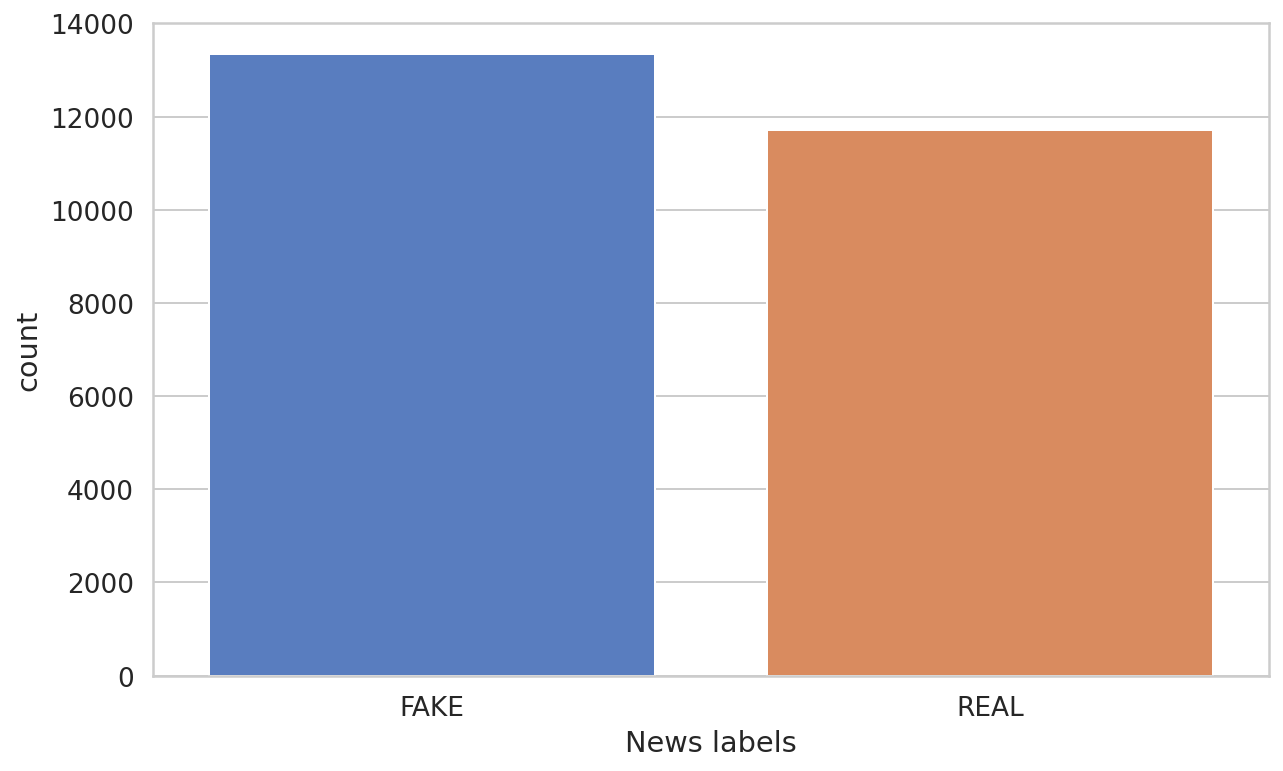

In [10]:
ax = sns.countplot(x = df.label);
plt.xlabel('News labels')
ax.set_xticklabels(labels = CLASS_NAMES);

We have a balanced classes, which means we may almost use any metric to evaluate the model. 

## BERT Tokenizer

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [12]:
token_lens = []

for txt in df.text:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


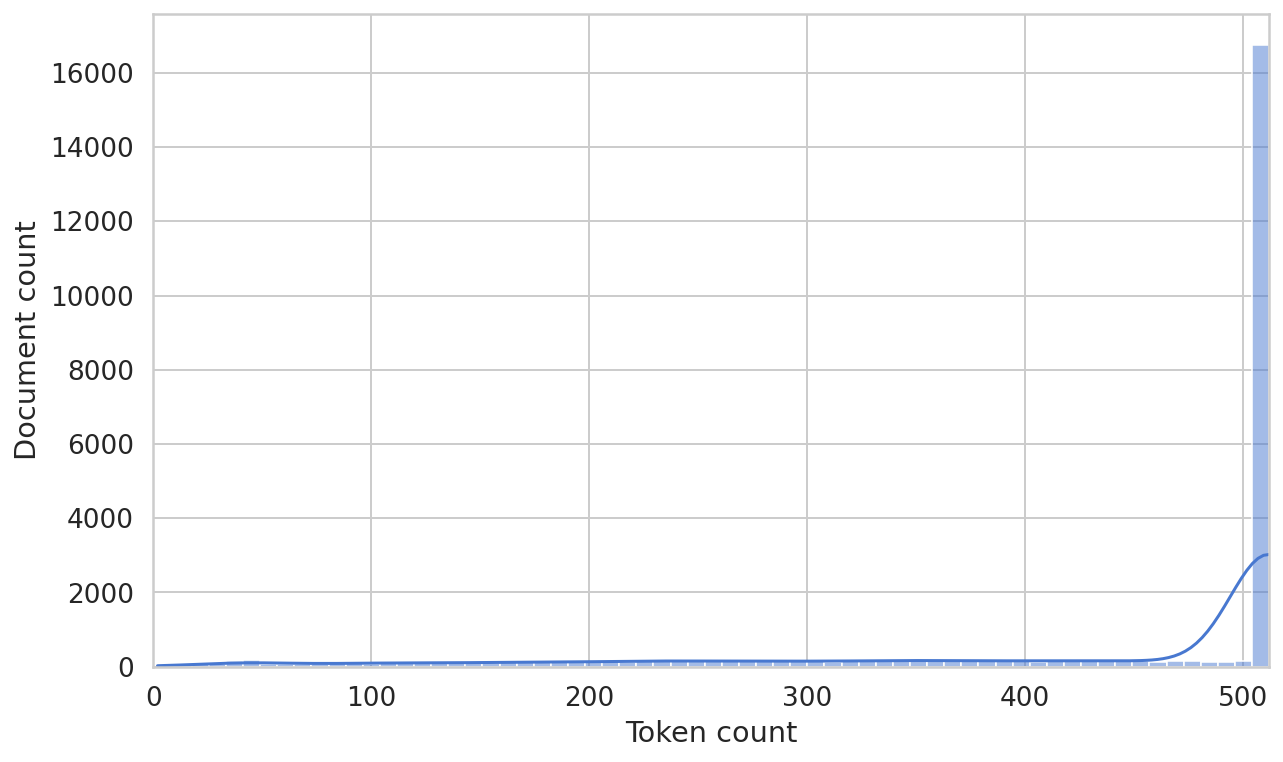

In [13]:
sns.histplot(token_lens, kde = True)
plt.xlim([0, 512]);
plt.xlabel('Token count');
plt.ylabel('Document count');

It seems that most of the documents have more than 512 tokens. Let's take a look at the distribution of the length of the whole documents. We will add a column to the data frame for the length of each document based on the words counts.

## Whitespace Tokenizer

In [14]:
df['News_length'] = df['text'].str.split().str.len()

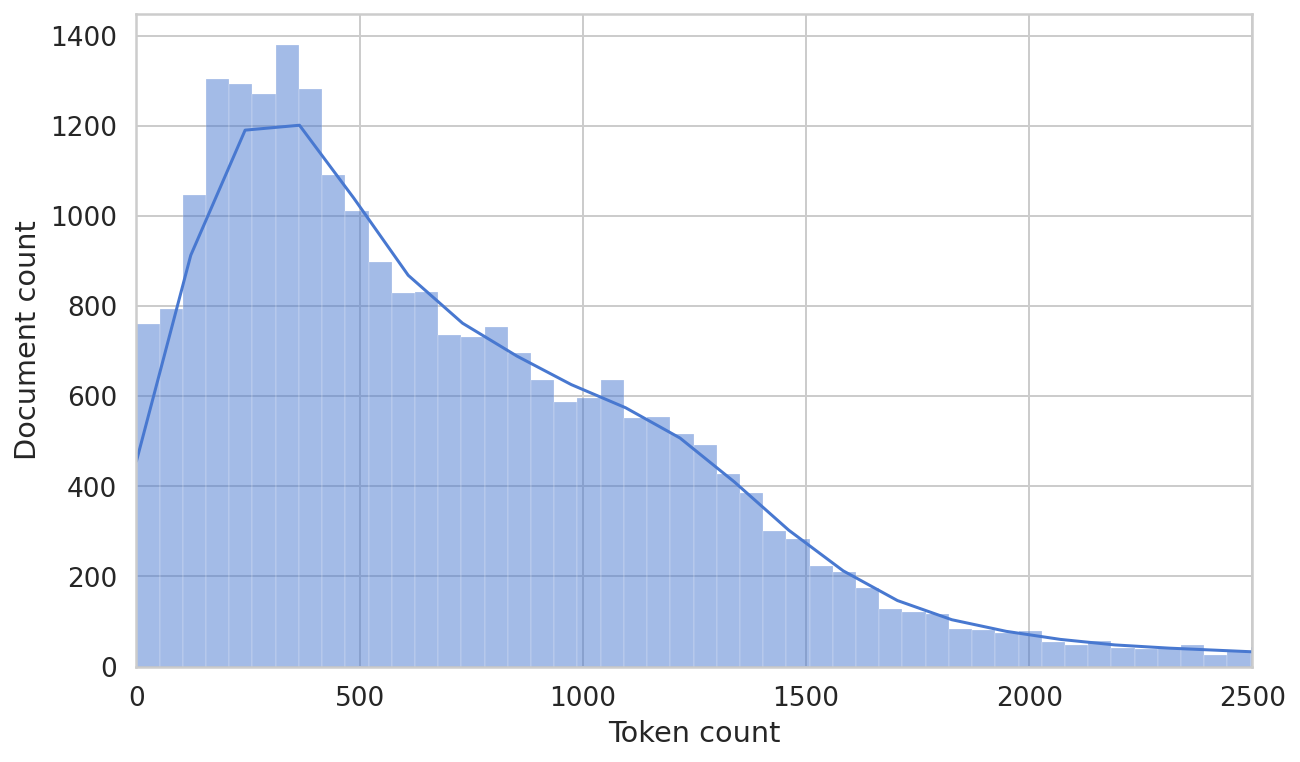

In [15]:
sns.histplot(df.News_length, kde = True)
plt.xlim([0, 2500]);
plt.xlabel('Token count');
plt.ylabel('Document count');

## News Length by Category

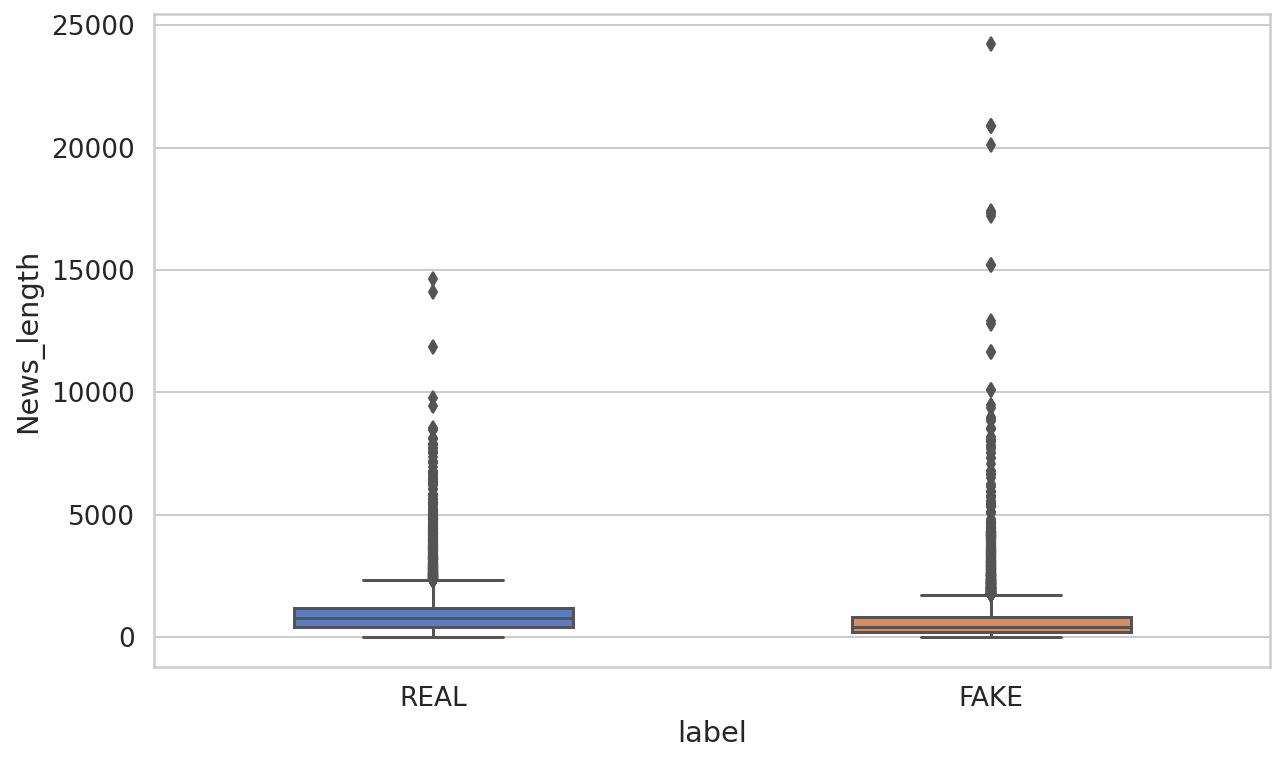

In [16]:
sns.boxplot(data=df, x='label', y='News_length', width=.5);

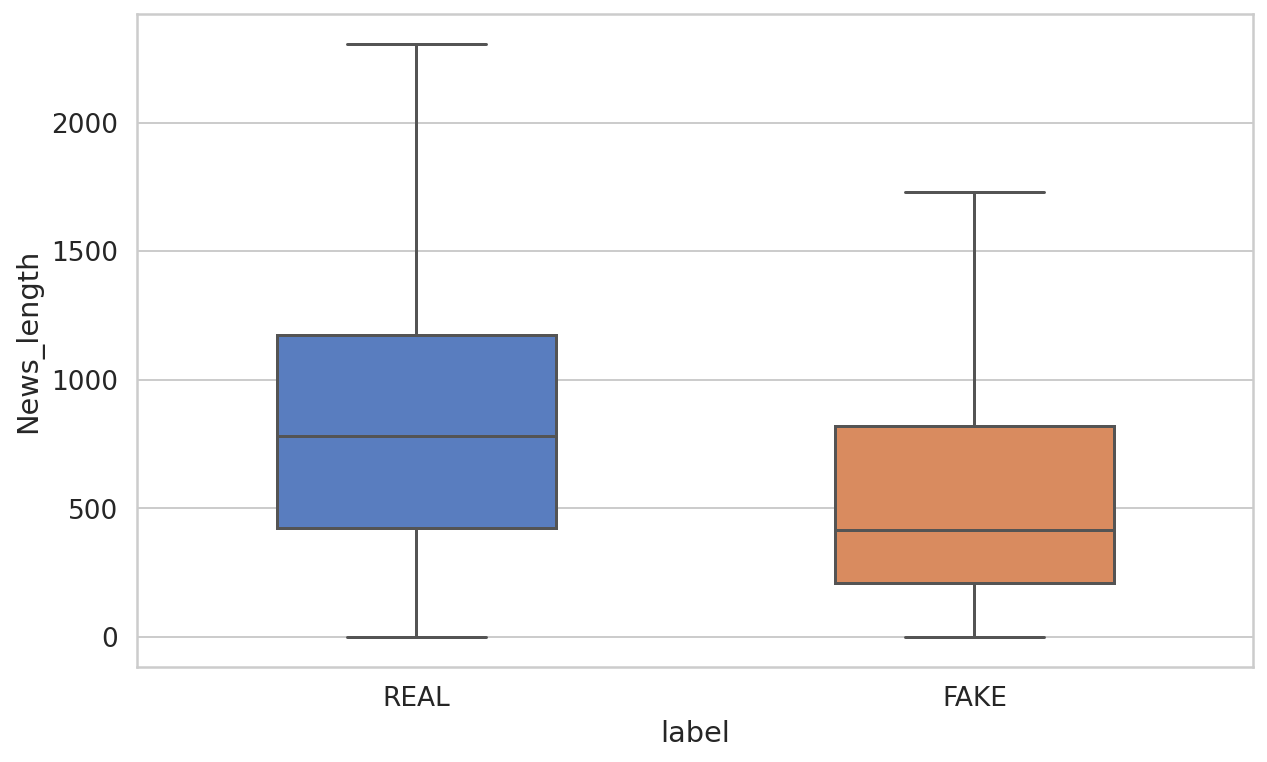

In [17]:
sns.boxplot(data=df, x='label', y='News_length', width=.5, showfliers = False);